In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('ETH-GBP.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,97.754478,100.102066,97.467186,98.714050,98.714050,5988583431
1,2020-01-02,98.727661,98.727661,96.602150,96.912010,96.912010,6109919641
2,2020-01-03,96.912827,102.866142,96.284966,102.573875,102.573875,8009516846
3,2020-01-04,102.571434,104.011894,101.709099,103.260132,103.260132,5680904209
4,2020-01-05,103.262215,106.521660,103.241982,104.199127,104.199127,5755001349


In [3]:
# Get descriptive statistics of the data
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1.253000e+03
mean,1293.477215,1331.268939,1251.623389,1294.330543,1294.330543,1.344192e+10
std,876.862717,901.777025,847.729389,875.782020,875.782020,7.382033e+09
min,89.659538,95.794762,75.827148,89.386742,89.386742,1.983693e+09
25%,339.103455,351.527344,331.429077,344.124268,344.124268,8.416774e+09
50%,1309.379150,1344.301514,1269.304810,1310.196167,1310.196167,1.204614e+10
75%,1830.331055,1920.147339,1743.126099,1827.550659,1827.550659,1.650592e+10
max,3546.210693,3635.696045,3480.266357,3547.697266,3547.697266,5.988639e+10


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
duplicate_rows


0

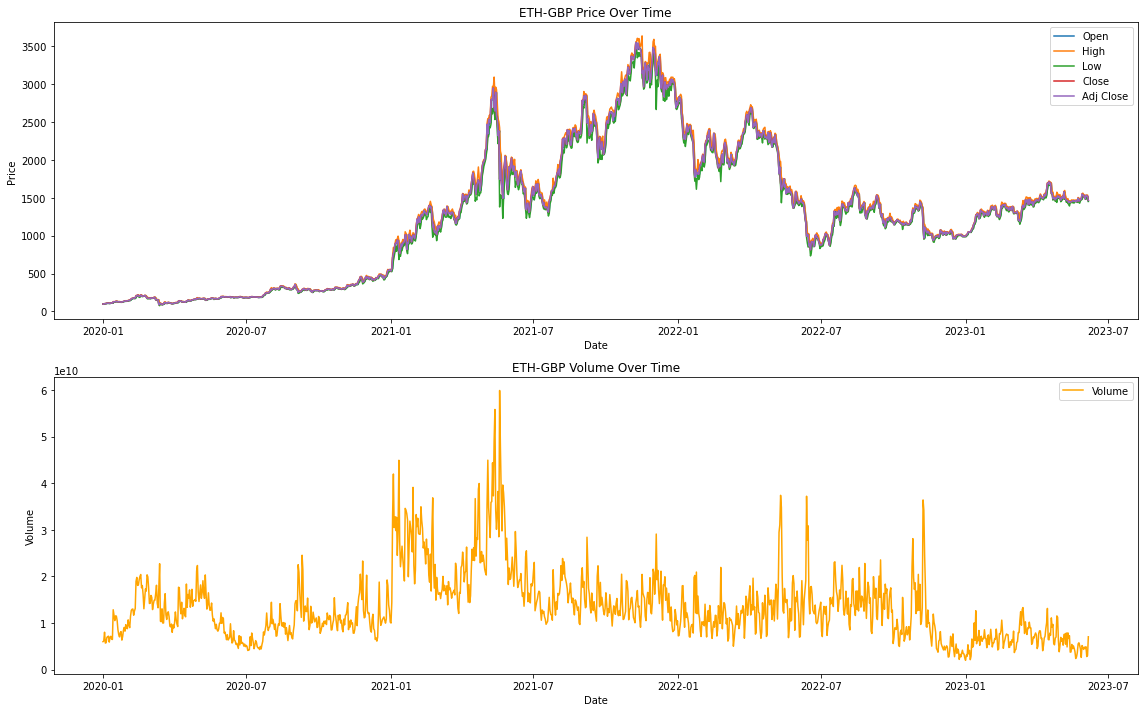

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set figure size
plt.figure(figsize=(16, 10))

# Plot the Open, High, Low, Close, Adj Close
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['High'], label='High')
plt.plot(data['Date'], data['Low'], label='Low')
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['Adj Close'], label='Adj Close')
plt.title('ETH-GBP Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot the Volume
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Volume'], label='Volume', color='orange')
plt.title('ETH-GBP Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()


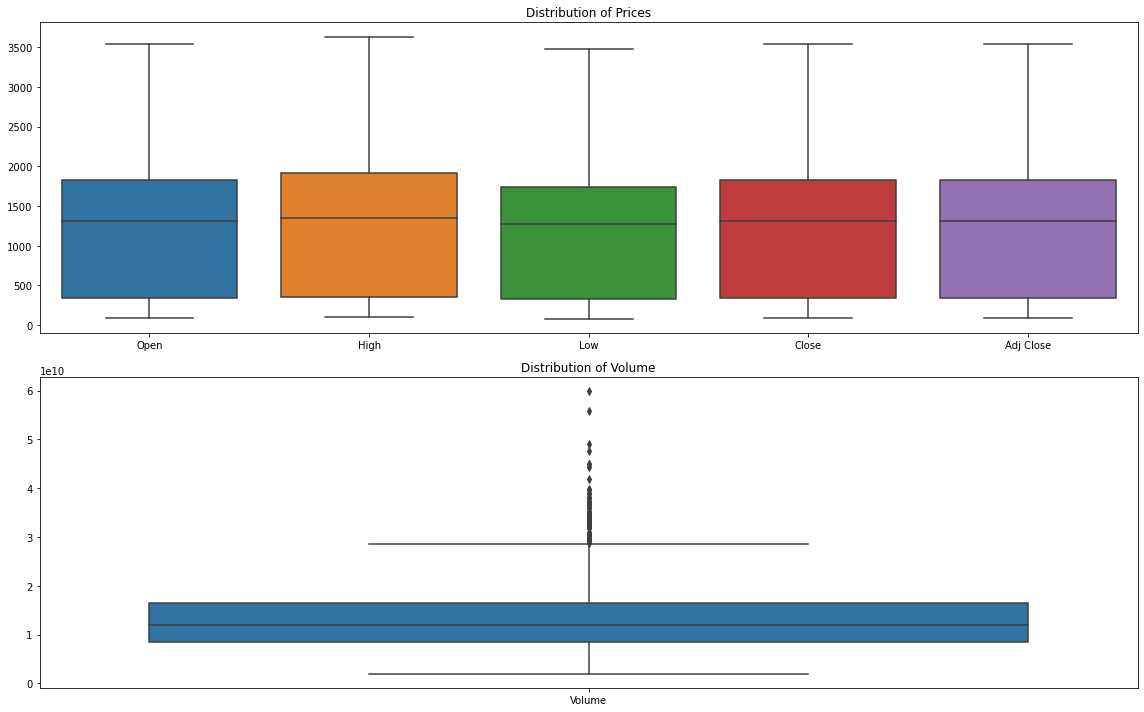

In [7]:
# Set figure size
plt.figure(figsize=(16, 10))

# Plot boxplots for Open, High, Low, Close, Adj Close
plt.subplot(2, 1, 1)
sns.boxplot(data=data[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.title('Distribution of Prices')

# Plot boxplot for Volume
plt.subplot(2, 1, 2)
sns.boxplot(data=data[['Volume']])
plt.title('Distribution of Volume')

plt.tight_layout()
plt.show()


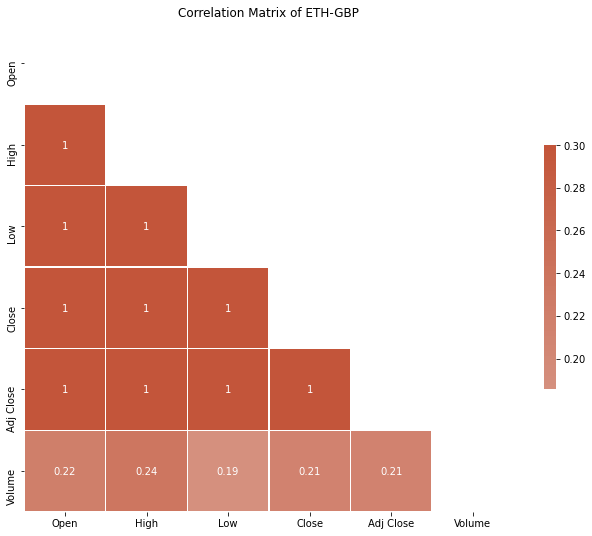

In [8]:
import numpy as np

# Compute the correlation matrix
corr = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of ETH-GBP')
plt.show()


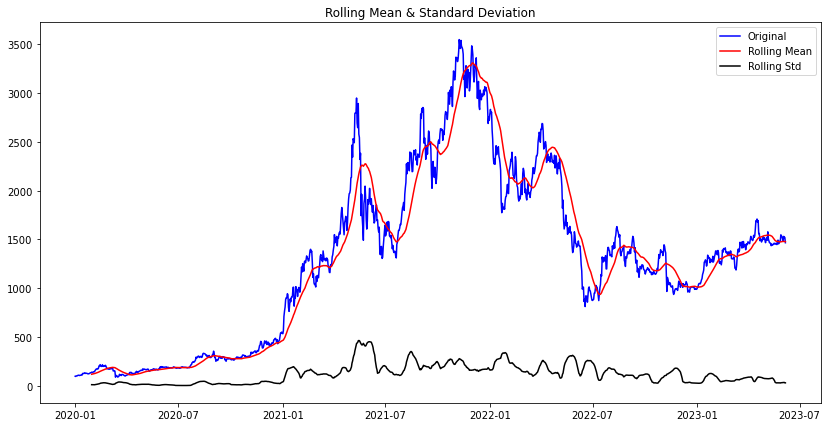

In [10]:
# Load the data again
data = pd.read_csv('ETH-GBP.csv')

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Calculate rolling mean and standard deviation
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

# Plot the rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue', label='Original')
plt.plot(data['Date'], rolling_mean, color='red', label='Rolling Mean')
plt.plot(data['Date'], rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


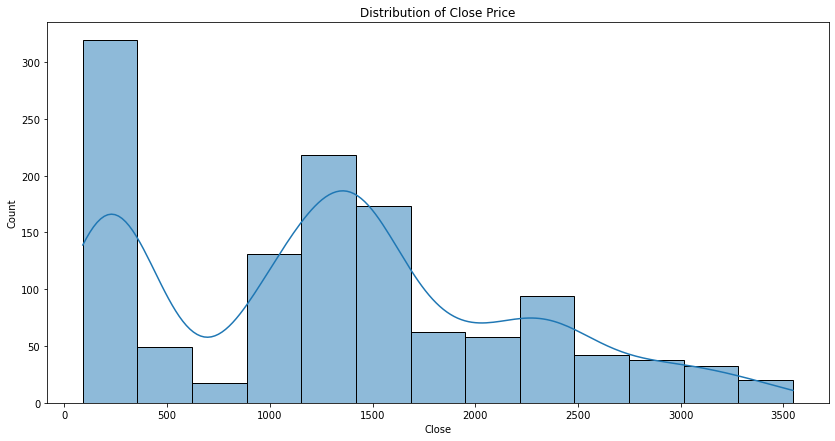

In [11]:
# Import necessary libraries
import seaborn as sns

# Plot histogram and KDE for 'Close' price
plt.figure(figsize=(14, 7))
sns.histplot(data=data, x='Close', kde=True)
plt.title('Distribution of Close Price')
plt.show()


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to get the average price of each month
data_monthly = data.resample('M', on='Date').mean()

# Perform seasonal decomposition
decomposition = seasonal_decompose(data_monthly['Close'])

# Plot the original data, the trend, the seasonality, and the residuals 
plt.figure(figsize=(14, 11))
plt.subplot(411)
plt.plot(data_monthly['Close'], label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (D:\Anaconda\lib\site-packages\scipy\signal\signaltools.py)

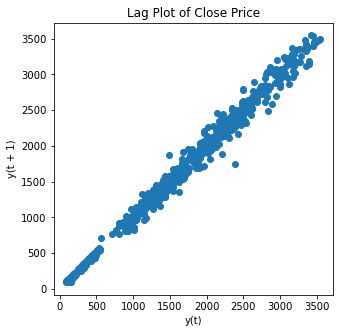

In [13]:
from pandas.plotting import lag_plot

# Create a lag plot for 'Close' price
plt.figure(figsize=(5, 5))
lag_plot(data['Close'])
plt.title('Lag Plot of Close Price')
plt.show()
